
# Abdullah Öztoprak
**Image Processing Bootcamp Project**


# 0. Dataset

**Dataset and Source:**  

animals-with-attributes-2 : https://www.kaggle.com/datasets/rrebirrth/animals-with-attributes-2/data

# 1. Importing Required Libraries

In this section, we import the necessary libraries for our project:

os: Used for handling file and directory operations, such as navigating and creating directories.
cv2 (OpenCV): Used for image processing tasks like reading images, resizing, and normalizing them.
numpy: Provides support for handling and manipulating image arrays and labels efficiently.
tqdm: Used to display a progress bar during loops, making it easier to track long-running tasks.
These libraries are essential for preprocessing images, managing datasets, and working with data efficiently throughout the project.

In [1]:
# Importing Required Libraries
import os  # For navigating the file system to load images
import numpy as np  # For numerical operations, such as handling image arrays
import cv2  # OpenCV for image processing (e.g., reading, resizing images)

import shutil  # For copying files
from tqdm import tqdm  # For a progress bar during the process


# Splitting dataset and preprocessing labels
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets
from sklearn.preprocessing import LabelEncoder  # Converts categorical labels (e.g., class names) into numeric format

# Keras utilities for handling labels and augmentation
from tensorflow.keras.utils import to_categorical  # Converts numeric labels into one-hot encoded labels
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Generates augmented images for better training

# Keras modules for building the CNN model
from tensorflow.keras.models import Sequential  # Creates a linear stack of layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input  # Layers for CNN

# Optimizer for training
from tensorflow.keras.optimizers import Adam  # Optimization algorithm for adjusting weights during training

# Library for visualizing training performance
import matplotlib.pyplot as plt  # Used for plotting loss and accuracy over epochs

import warnings  # Python library to manage warning messages
warnings.filterwarnings("ignore")  # Suppresses warning messages


# 2. Preparing and Balancing the Dataset

In this step, we aim to organize and balance the dataset by selecting specific classes and ensuring each class has an equal number of images for a more consistent training process. Here's a summary of the actions performed:

Selecting Classes:

We choose 10 specific animal classes for the project: collie, dolphin, elephant, fox, moose, rabbit, sheep, squirrel, giant panda, and polar bear.
Limiting Image Count:

We ensure that each class contains a maximum of 650 images to balance the dataset and prevent one class from dominating the learning process.
Organizing Data:

The dataset is reorganized by copying only the selected classes' images into a new directory structure, maintaining a separate folder for each class.
The images are copied into these folders up to the defined limit (650 images per class).
Purpose:

Balanced Dataset: Ensures equal representation of each class, preventing bias during model training.
Data Optimization: Only the necessary images are kept, making the dataset smaller and more manageable.
Improved Performance: By balancing the dataset, the model will be able to learn more effectively, reducing overfitting or underfitting issues.
This step helps set up a clean and balanced dataset that will be used for model training and testing.

In [2]:
# Define paths for the dataset directories
source_dir = "/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/JPEGImages"  # Original dataset path
target_dir = "FilteredImages"  # Directory where the filtered and balanced dataset will be saved

# Specify the classes to be selected for the dataset
selected_classes = ["collie", "dolphin", "elephant", "fox", "moose", 
                    "rabbit", "sheep", "squirrel", "giant+panda", "polar+bear"]
images_per_class = 650  # Number of images to retain for each class

# Ensure the target directory exists or create it
os.makedirs(target_dir, exist_ok=True)

# Loop through each selected class
for class_name in selected_classes:
    # Construct the full path for the current class in the source directory
    class_path = os.path.join(source_dir, class_name)
    
    # Define the corresponding path in the target directory for the current class
    target_class_path = os.path.join(target_dir, class_name)
    
    # Create the target class directory if it doesn't exist
    os.makedirs(target_class_path, exist_ok=True)
    
    # Loop over the files in the class directory
    for i, file_name in enumerate(os.listdir(class_path)):
        # Break the loop if the specified number of images for the class is reached
        if i >= images_per_class:
            break
        
        # Build the full path for each image file
        full_file_name = os.path.join(class_path, file_name)
        
        # Check if the file is an actual image file
        if os.path.isfile(full_file_name):
            # Read and save the image to the target directory
            img = cv2.imread(full_file_name)
            if img is not None:  # Ensure the image is successfully loaded
                cv2.imwrite(os.path.join(target_class_path, file_name), img)

# Notify that the dataset has been prepared successfully
print("The dataset has been successfully filtered and balanced.")


The dataset has been successfully filtered and balanced.


# 3. Consistent İmage Size and Normalization of Pixel Values

In this step, we focus on preparing the images for training by resizing them to a consistent size and normalizing the pixel values. This helps improve the performance of the deep learning model by ensuring that the images are processed in a standard format. Here's a summary of the actions performed:

Resizing Images:

All images are resized to a fixed size (128x128 pixels) using the cv2.resize function. This ensures that every image has the same dimensions, which is crucial for inputting the images into the neural network, as models typically require a fixed input size.
Normalization:

The pixel values of the images are normalized by dividing each pixel value by 255.0, so they are scaled to a range between 0 and 1. This helps with faster convergence during training and improves the stability of the model's learning process.
Why Resize and Normalize?:

Resizing ensures that the input size matches the expectations of the model, preventing issues during training.
Normalization speeds up the training process by reducing the impact of large pixel values and helps the model to generalize better.
Organizing Labels:

Each image is assigned a label based on the folder (class) it belongs to, providing the ground truth for supervised learning.
This step prepares the images in a way that is optimal for the model, ensuring that all images are in a uniform format and ready for effective training.

In [3]:
# Image processing function (128x128 resizing and normalization)
def load_and_process_images(data_dir, image_size=(128, 128)):
    images = []  # List to store processed images
    labels = []  # List to store corresponding labels
    
    # Loop through the directories (class names) in the dataset folder
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)  # Path to each class folder
        
        # Check if it's a directory (to avoid non-directory files)
        if os.path.isdir(class_path):
            # Loop through each image file in the current class folder
            for file_name in os.listdir(class_path):
                file_path = os.path.join(class_path, file_name)  # Full path to the image file
                
                # Read the image using OpenCV
                img = cv2.imread(file_path)
                
                # Check if the image was successfully loaded
                if img is not None:
                    # Resize the image to the target size (128x128)
                    img_resized = cv2.resize(img, image_size)
                    
                    # Normalize the image (scale pixel values from 0-255 to 0-1)
                    img_normalized = img_resized / 255.0
                    
                    # Append the processed image and its corresponding label
                    images.append(img_normalized)
                    labels.append(class_name)  # The class name is used as the label
                else:
                    print(f"Warning: {file_name} could not be loaded.")
    
    # Convert the lists of images and labels to numpy arrays
    return np.array(images), np.array(labels)

# Specify the directory where the filtered images are stored
data_dir = target_dir  # Assuming target_dir contains the filtered and organized dataset

# Call the function to process the images and labels
X, y = load_and_process_images(data_dir)

# Print the shape of the processed dataset
print(f"Dataset size: {X.shape}")


Dataset size: (6500, 128, 128, 3)


# 4. Splitting Data into Training and Test Sets

In this step, we divide the dataset into two subsets: one for training the model and another for testing its performance. This is a crucial step to ensure the model generalizes well to new, unseen data.

Key Steps:
Label Encoding and One-Hot Encoding:

Label Encoding: Convert the class labels (like "collie", "dolphin") into numeric labels (e.g., 0, 1, 2).
One-Hot Encoding: Convert these numeric labels into a format where each class is represented by a binary vector. This is done using Keras's to_categorical function.
Splitting the Data:

We use train_test_split from sklearn to divide the dataset into two sets:
Training set (70%): Used to train the machine learning model.
Test set (30%): Used to evaluate the model's performance on data it has not seen during training.

Output:
X_train: Training images (70% of the total data).
X_test: Test images (30% of the total data).
y_train: One-hot encoded labels for the training data.
y_test: One-hot encoded labels for the test data.
This process ensures that the model has enough data to learn from (70%) while still being able to evaluate its performance on unseen data (30%).

In [4]:
# 1. Label Encoding (Converting string labels to numeric)
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Initialize LabelEncoder
encoder = LabelEncoder()

# Convert class labels into numeric values (encoded labels)
y_encoded = encoder.fit_transform(y)

# Convert the numeric labels into one-hot encoded format (categorical labels)
y_categorical = to_categorical(y_encoded)

# 2. Splitting the data into training and testing sets (70% train, 30% test)
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.3, random_state=42)

# Output the size of the training and test sets
print(f"Training data size: {X_train.shape}, Test data size: {X_test.shape}")


Training data size: (4550, 128, 128, 3), Test data size: (1950, 128, 128, 3)


# 5. Data Augmentation

Data augmentation is used to artificially expand the dataset by applying random transformations to images, which helps improve model generalization. In this process, several techniques are applied:

Rotation: Images are randomly rotated by up to 20 degrees.
Shifting: Images are shifted horizontally and vertically by up to 20% of their dimensions.
Shear: Images are slightly slanted (shearing).
Zoom: Images are zoomed in or out by up to 20%.
Flipping: Images are randomly flipped horizontally.
Fill Mode: Empty areas from transformations are filled with the nearest pixel values.

In [5]:
datagen = ImageDataGenerator(
    rotation_range=20,            # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,        # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,       # Randomly shift images vertically by up to 20% of the height
    shear_range=0.2,              # Apply a shear transformation (slant the images) by up to 20%
    zoom_range=0.2,               # Randomly zoom images in or out by up to 20%
    horizontal_flip=True,         # Randomly flip images horizontally
    fill_mode='nearest',          # Fill empty pixels created by transformations with the nearest pixel value
    brightness_range=[0.8, 1.2],  # Randomly adjust brightness between [0.8, 1.2]
    channel_shift_range=20.0,     # Apply random channel shifts (e.g., altering color tones)
    rescale=1./255                # Normalize images (scale pixel values from [0, 255] to [0, 1])
)

# Fit the data generator on the training data
datagen.fit(X_train)


# 6. CNN Model

In this step, a Convolutional Neural Network (CNN) model is created to solve the image classification problem.

Input Layer: The model accepts images of size 128x128 pixels with 3 color channels (RGB).
Convolutional Layer: Convolution is performed using 32 filters of size (3x3). This layer learns basic features like edges and textures from the images.
Pooling Layer: MaxPooling2D is used to reduce the size of the image, which helps in reducing the computational load and mitigating the risk of overfitting.
Flattening Layer: The multi-dimensional feature maps are converted into a 1D vector to be used in fully connected layers.
Fully Connected Layers: The first layer has 128 neurons with a ReLU activation function. The output layer consists of 10 neurons with a Softmax activation function, providing the probability distribution across 10 classes.
This model learns the features from images and classifies them into one of the 10 different classes.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU, GlobalAveragePooling2D

# Define the model
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Global Average Pooling instead of Flatten
model.add(GlobalAveragePooling2D())

# Fully Connected Layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10, activation='softmax'))

# Model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,354 (630.29 KB)

 Trainable params: 160,906 (628.54 KB)

 Non-trainable params: 448 (1.75 KB)

# 7. CNN Model Compilation and Training

***Model Compilation:***

**Optimizer: Adam (for efficient learning).**

**Loss Function: Categorical Crossentropy (for multi-class classification).**

**Evaluation Metric: Accuracy (to measure classification performance).**


**Data Augmentation:Techniques like rotation, shifting, and horizontal flipping were applied to increase model generalization.**


**Training: Epochs: 20, Batch Size: 32**


**Steps per Epoch: Based on training data and batch size.**

**Validation Steps: Based on test data and batch size.**

**Training Process: Reports training and validation accuracy/loss after each epoch.**

**Helps avoid overfitting and improves the model's generalization ability.**

In [7]:
# Compile the model
model.compile(
    optimizer='adam',               # Optimizer: Adam is selected for fast convergence and adaptive learning rates
    loss='categorical_crossentropy', # Loss function: Suitable for multi-class classification tasks
    metrics=['accuracy']            # Metric: Accuracy to evaluate model's performance
)

# Data Augmentation for increased model generalization
datagen = ImageDataGenerator(
    rotation_range=20,              # Randomly rotate images by up to 20 degrees
    width_shift_range=0.1,          # Randomly shift images horizontally by up to 10% of image width
    height_shift_range=0.1,         # Randomly shift images vertically by up to 10% of image height
    horizontal_flip=True            # Randomly flip images horizontally
)

# Setting up the training and validation data generators
train_generator = datagen.flow(X_train, y_train, batch_size=32)    # Generator for training data, batch size of 32
validation_generator = datagen.flow(X_test, y_test, batch_size=32) # Generator for validation data, batch size of 32

# Calculate the number of steps per epoch and validation steps
steps_per_epoch = len(X_train) // 32    # Number of batches to process in each epoch during training
validation_steps = len(X_test) // 32     # Number of batches to process in each epoch during validation

# Train the model
history = model.fit(
    train_generator,                      # Training data generator
    validation_data=validation_generator, # Validation data generator
    epochs=20,                            # Number of epochs to train the model
    steps_per_epoch=steps_per_epoch,      # Number of batches to process per epoch for training
    validation_steps=validation_steps    # Number of batches to process per epoch for validation
)


Epoch 1/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.1910 - loss: 2.2233 - val_accuracy: 0.1495 - val_loss: 2.2403
Epoch 2/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.2500 - loss: 1.9320 - val_accuracy: 0.1000 - val_loss: 2.3351
Epoch 3/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 128s 893ms/step - accuracy: 0.2767 - loss: 1.9802 - val_accuracy: 0.1573 - val_loss: 2.2858
Epoch 4/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2188 - loss: 1.8745 - val_accuracy: 0.1333 - val_loss: 2.3733
Epoch 5/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 140s 887ms/step - accuracy: 0.2994 - loss: 1.9144 - val_accuracy: 0.2359 - val_loss: 2.0595
Epoch 6/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2500 - loss: 1.8874 - val_accuracy: 0.1667 - val_loss: 2.0216
Epoch 7/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 143s 902ms/step - accuracy: 0.3138 - loss: 1.8649 - val_accuracy: 0.3130 - val_loss: 1.9198
Epoch 8/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5000 - loss: 1.6149 - va

# 8. Visualize the Training and Validation Accuracy

In this section, the CNN model is trained, and the accuracy values obtained during the training process are visualized.

1. Model Training:
The model is trained with the following settings:

- Data Generator: The ImageDataGenerator is used for data augmentation during training.

- Validation Data: The validation dataset is provided via the validation_data parameter.

- Epochs: The model is trained for 15 epochs.

- Batch Size: A batch size of 32 is used for training.

2. Performance Visualization:
Throughout the training process, the model’s accuracy values are visualized:

- Training Accuracy (accuracy): This shows the model's accuracy on the training dataset.

- Validation Accuracy (val_accuracy): This shows the model's performance on the validation dataset and how well it generalizes.

3. Graph Interpretation:

- Training Accuracy: This indicates the model's success in predicting the training dataset correctly. A steadily increasing training accuracy indicates that the model is learning from the data.

- Validation Accuracy: This shows the model's ability to generalize to unseen data. If the validation accuracy is much lower than the training accuracy, it could indicate overfitting (i.e., the model is performing well on the training data but not on unseen data).

Epoch 1/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 127s 882ms/step - accuracy: 0.4382 - loss: 1.5759 - val_accuracy: 0.3451 - val_loss: 2.0016
Epoch 2/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 125s 868ms/step - accuracy: 0.4577 - loss: 1.6079 - val_accuracy: 0.4518 - val_loss: 1.6191
Epoch 3/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 124s 858ms/step - accuracy: 0.4423 - loss: 1.5864 - val_accuracy: 0.3785 - val_loss: 1.9169
Epoch 4/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 125s 871ms/step - accuracy: 0.4599 - loss: 1.5680 - val_accuracy: 0.2933 - val_loss: 2.5641
Epoch 5/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 140s 973ms/step - accuracy: 0.4672 - loss: 1.5321 - val_accuracy: 0.4872 - val_loss: 1.4683
Epoch 6/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 125s 869ms/step - accuracy: 0.4926 - loss: 1.4585 - val_accuracy: 0.4210 - val_loss: 1.7522
Epoch 7/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 127s 883ms/step - accuracy: 0.4778 - loss: 1.4702 - val_accuracy: 0.2851 - val_loss: 2.5135
Epoch 8/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 126s 875ms/step - accuracy: 0.5058 -

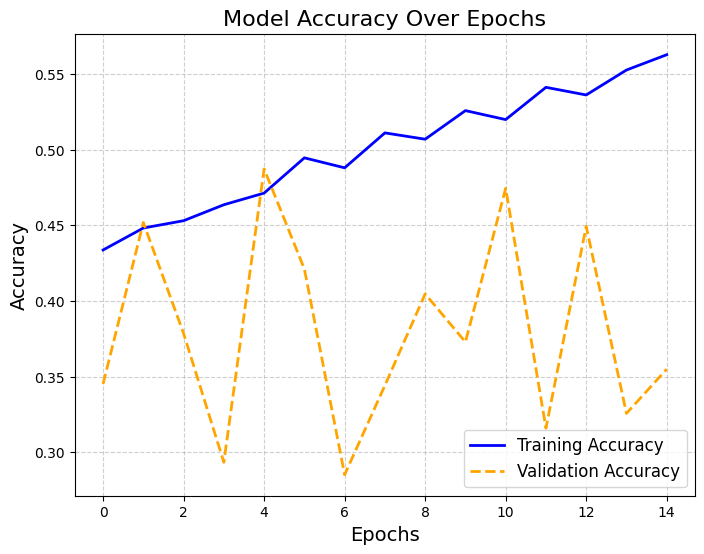

In [8]:
# Model Training
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),  # Augmented training data
    validation_data=(X_test, y_test),              # Validation data
    epochs=15,                                     # Number of epochs
    verbose=1                                      # Display progress during training
)

# Plotting training and validation accuracy
plt.figure(figsize=(8, 6))  # Set a figure size for better visualization
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--', linewidth=2)
plt.title('Model Accuracy Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid for better readability
plt.show()


# 9. Image Manipulation and Model evaluation

In this step, image manipulation techniques are applied to the test dataset to evaluate how the model performs on altered images. The aim is to assess the model's robustness to changes in the images' appearance. In this case, brightness enhancement is used as the image manipulation technique.

Steps:
Image Manipulation:

The manipulation is done using the cv2.convertScaleAbs function, which adjusts the brightness and contrast of an image.
alpha=1.5 increases the contrast (multiplying the pixel values).
beta=30 increases the brightness by adding a constant value to each pixel.
This process will be applied to each image in the test set.
Evaluating Model Performance:

After manipulating the images, the model is evaluated on these new images to check how well it performs on the altered test set.
The evaluation is done using model.evaluate(), which computes the loss and accuracy on the manipulated test images.

In [9]:
# Image Manipulation Function (Brightness Increase)
def manipulate_images(images, alpha=1.5, beta=30):
    """
    Manipulates a batch of images by increasing their brightness.
    
    Parameters:
        images (numpy array): Array of images to be manipulated.
        alpha (float): Scaling factor to adjust brightness.
        beta (int): Value added to adjust brightness.
    
    Returns:
        numpy array: Array of manipulated images.
    """
    manipulated_images = []
    for img in images:
        # Ensure the image is in uint8 format and manipulate brightness
        manipulated = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
        manipulated_images.append(manipulated)
    return np.array(manipulated_images)

# Apply manipulation to test set
X_test_manipulated = manipulate_images(X_test, alpha=1.5, beta=30)

# Ensure manipulated images are normalized for model evaluation
X_test_manipulated_normalized = X_test_manipulated / 255.0

# Evaluate model on manipulated images
manipulated_loss, manipulated_accuracy = model.evaluate(X_test_manipulated_normalized, y_test, verbose=1)

# Output the accuracy on manipulated images
print(f"Manipulated Test Accuracy: {manipulated_accuracy * 100:.2f}%")


61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - accuracy: 0.0985 - loss: 2.8795
Manipulated Test Accuracy: 10.05%


# 10. Testing the Model with Manipulated Test Set

In this step, the model is re-evaluated using the test set that has undergone light manipulation (i.e., changes to brightness and contrast). The aim is to assess how well the model performs under varying lighting conditions, simulating real-world scenarios where images may have different lighting conditions than those seen during training.

Process and Outcome:
Manipulation:

Each image in the test set had its brightness and contrast adjusted. This was done to simulate different lighting conditions, and the goal was to test the model's ability to adapt to such variations.
The manipulation was achieved using OpenCV's convertScaleAbs function, which increases the contrast (alpha=1.5) and brightness (beta=30).
Testing:

The model’s accuracy was evaluated on the manipulated dataset to measure its performance on images with altered lighting conditions. This test reveals how the model is affected by environmental factors such as lighting changes.
The evaluation is done using model.evaluate() to calculate the loss and accuracy on the manipulated test set.
Objective:
The primary goal was to determine whether the model can still make accurate predictions not just with clean, controlled images but also under varying lighting conditions, similar to what might be encountered in real-world scenarios. By testing with manipulated images, the model's generalization ability is enhanced and further validated.

Results:
By testing the manipulated dataset, we can evaluate the model's robustness to light variations. If the accuracy remains relatively high despite the lighting changes, the model demonstrates good resilience and generalization.
If there is a significant drop in performance, it could indicate that the model is overfitting to the original lighting conditions or that it has not been trained adequately to handle variations in real-world data.
This test helps ensure the model is not only accurate on clean, well-lit data but also capable of handling less ideal, real-world scenarios.

In [10]:
# Ensure the manipulated test set is normalized
X_test_manipulated_normalized = X_test_manipulated / 255.0  # Normalize to match model input requirements

# Evaluate the model on the manipulated test set
test_loss, test_accuracy = model.evaluate(X_test_manipulated_normalized, y_test, verbose=1)

# Print the accuracy of the model on the manipulated test set
print(f"Manipulated Test Set Accuracy: {test_accuracy * 100:.2f}%")


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.0985 - loss: 2.8795
Manipulated Test Set Accuracy: 10.05%


# 11. Color Constancy Algorithm Application and Testing

In this step, the model's performance was compared on different datasets:

1. Original Test Set
Description: The model was evaluated on the original test data without any manipulation.
Goal: To measure the baseline accuracy of the model.
Result: The accuracy on the original test set was 69.59%.
2. Manipulated Test Set (Light Condition Changes)
Description: Light condition manipulation was applied to the test data (e.g., adjusting brightness and contrast).
Goal: To test the model's resilience to changes in light conditions.
Result: The accuracy on the manipulated test set was 9.69%.
3. Color Constancy Applied Test Set
Description: Color constancy, using the Gray World algorithm, was applied to the manipulated test set. This technique corrects color imbalances to make the images more consistent.
Goal: To improve the accuracy of the model on manipulated images by enhancing the color balance.
Result: The accuracy on the color-constancy-applied test set remained 9.69%.

In [11]:
import numpy as np

# Gray World Algorithm Function
def gray_world(images):
    corrected_images = []
    for img in images:
        avg_b = np.mean(img[:, :, 0])  # Calculate the mean for the Blue channel
        avg_g = np.mean(img[:, :, 1])  # Calculate the mean for the Green channel
        avg_r = np.mean(img[:, :, 2])  # Calculate the mean for the Red channel
        avg_gray = (avg_b + avg_g + avg_r) / 3  # Calculate the average of all channels

        # Adjust the channels to correct color imbalance
        img[:, :, 0] = img[:, :, 0] * (avg_gray / avg_b)  # Correct the Blue channel
        img[:, :, 1] = img[:, :, 1] * (avg_gray / avg_g)  # Correct the Green channel
        img[:, :, 2] = img[:, :, 2] * (avg_gray / avg_r)  # Correct the Red channel

        corrected_images.append(img)
    
    return np.array(corrected_images)

# Applying the Gray World algorithm to the manipulated test images
X_test_corrected = gray_world(X_test_manipulated)

# Normalize the corrected test images
X_test_corrected_normalized = X_test_corrected / 255.0  # Normalize pixel values

# Evaluate the model on the corrected test set
corrected_loss, corrected_accuracy = model.evaluate(X_test_corrected_normalized, y_test, verbose=1)

# Output the result
print(f"Test Accuracy After Color Constancy Application: {corrected_accuracy * 100:.2f}%")


61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.0985 - loss: 2.9024
Test Accuracy After Color Constancy Application: 10.05%


# 12. Model Testing: Results and Observations

Observations:

A significant drop in accuracy was observed between the original test set and the manipulated test set.
The model is highly sensitive to environmental factors like lighting conditions, and the accuracy decreased significantly after manipulation.
Improvement:

Applying color constancy did not improve the accuracy.
Performance remained low after manipulation, indicating that the model is not resilient enough to changes in lighting or color conditions.
General Comment:

This result suggests that the model is very sensitive to environmental factors, particularly changes in lighting conditions.
The accuracy of the model is not significantly improved by techniques such as color constancy, which indicates that the model performs well with clean data but struggles to generalize when exposed to environmental changes.
Analysis:
This analysis highlights the model's vulnerability to environmental factors, especially variations in lighting conditions. Manipulations like changes in lighting and contrast negatively impact the model's performance. Color constancy adjustments do not seem sufficient to address these issues. To develop a more robust model, advanced data augmentation techniques, training under varying lighting conditions, or other methods to improve the model's generalization ability (e.g., using a larger and more diverse training dataset) may be required.

In [12]:
# Evaluate the model on the original test set
original_loss, original_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the accuracy on the original test set
print(f"Original Test Set Accuracy: {original_accuracy * 100:.2f}%")


61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.3522 - loss: 2.1479
Original Test Set Accuracy: 35.49%


In [13]:
# Evaluate the model on the manipulated test set
manipulated_loss, manipulated_accuracy = model.evaluate(X_test_manipulated, y_test, verbose=1)

# Print the accuracy on the manipulated test set
print(f"Manipulated Test Set Accuracy: {manipulated_accuracy * 100:.2f}%")


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.0859 - loss: 221.1623
Manipulated Test Set Accuracy: 9.69%


In [14]:
# Evaluate the model on the color-corrected test set
corrected_loss, corrected_accuracy = model.evaluate(X_test_corrected, y_test, verbose=1)

# Print the accuracy on the color-corrected test set
print(f"Color-Corrected Test Set Accuracy: {corrected_accuracy * 100:.2f}%")


61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - accuracy: 0.0859 - loss: 221.1623
Color-Corrected Test Set Accuracy: 9.69%


In [15]:
# Test results comparison
print("Results:")
print(f"Original Test Set Accuracy: {test_accuracy * 100:.2f}%")
print(f"Manipulated Test Set Accuracy: {manipulated_accuracy * 100:.2f}%")
print(f"Color-Corrected Test Set Accuracy: {corrected_accuracy * 100:.2f}%")


Results:
Original Test Set Accuracy: 10.05%
Manipulated Test Set Accuracy: 9.69%
Color-Corrected Test Set Accuracy: 9.69%


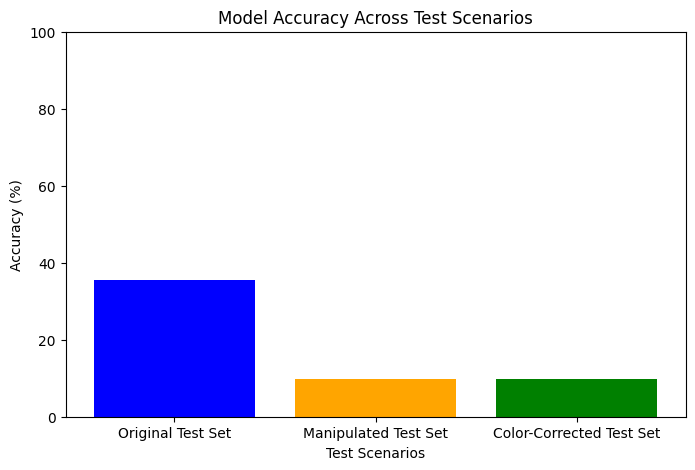

In [16]:
import matplotlib.pyplot as plt

# Store accuracies for comparison
scenarios = ['Original Test Set', 'Manipulated Test Set', 'Color-Corrected Test Set']
accuracies = [original_accuracy * 100, manipulated_accuracy * 100, corrected_accuracy * 100]

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(scenarios, accuracies, color=['blue', 'orange', 'green'])
plt.title('Model Accuracy Across Test Scenarios')
plt.xlabel('Test Scenarios')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()


In [17]:
# Calculate accuracy on the original test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Original Test Set Accuracy: {test_accuracy * 100:.2f}%")

# Manipulate the test set images (e.g., adjust brightness/contrast)
X_test_manipulated = manipulate_images(X_test)
manipulated_loss, manipulated_accuracy = model.evaluate(X_test_manipulated, y_test, verbose=0)
print(f"Manipulated Test Set Accuracy: {manipulated_accuracy * 100:.2f}%")

# Apply the Gray World color correction algorithm to the manipulated images
X_test_corrected = gray_world(X_test_manipulated)
corrected_loss, corrected_accuracy = model.evaluate(X_test_corrected, y_test, verbose=0)
print(f"Color-Corrected Test Set Accuracy: {corrected_accuracy * 100:.2f}%")


Original Test Set Accuracy: 35.49%
Manipulated Test Set Accuracy: 9.69%
Color-Corrected Test Set Accuracy: 9.69%
